In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Chicago_Crimes_2012_to_2017.csv', 'Chicago_Crimes_2008_to_2011.csv', 'Chicago_Crimes_2005_to_2007.csv', 'Chicago_Crimes_2001_to_2004.csv']


In [2]:
crimes_12to17 = pd.read_csv('../input/Chicago_Crimes_2012_to_2017.csv')

In [3]:
crimes_12to17.head(2)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"


In [4]:
crimes_12to17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
ID                      1456714 non-null int64
Case Number             1456713 non-null object
Date                    1456714 non-null object
Block                   1456714 non-null object
IUCR                    1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Beat                    1456714 non-null int64
District                1456713 non-null float64
Ward                    1456700 non-null float64
Community Area          1456674 non-null float64
FBI Code                1456714 non-null object
X Coordinate            1419631 non-null float64
Y Coordinate            1419631 non-null float64
Year                    1

In [5]:
crimes_12to17['Date'] = pd.to_datetime(crimes_12to17['Date'], format='%m/%d/%Y %I:%M:%S %p')

In [6]:
crimes_12to17.index = pd.DatetimeIndex(crimes_12to17['Date'])

In [7]:
crimes_12to17['Year'] = crimes_12to17['Date'].dt.year 
crimes_12to17['Month'] = crimes_12to17['Date'].dt.month 
crimes_12to17['Day'] = crimes_12to17['Date'].dt.day 

In [8]:
crimes_12to17.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,3
2016-05-03 21:40:00,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,3
2016-05-03 23:31:00,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,3
2016-05-03 22:10:00,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,3
2016-05-03 22:00:00,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,3


In [22]:
crimes_12to17['Primary Type'].value_counts()

THEFT                                321950
BATTERY                              258941
CRIMINAL DAMAGE                      152812
NARCOTICS                            131177
ASSAULT                               89508
OTHER OFFENSE                         85361
BURGLARY                              81668
DECEPTIVE PRACTICE                    67609
MOTOR VEHICLE THEFT                   59856
ROBBERY                               56092
CRIMINAL TRESPASS                     36429
WEAPONS VIOLATION                     16983
PUBLIC PEACE VIOLATION                13015
OFFENSE INVOLVING CHILDREN            10590
PROSTITUTION                           7567
CRIM SEXUAL ASSAULT                    6298
INTERFERENCE WITH PUBLIC OFFICER       6136
SEX OFFENSE                            4491
HOMICIDE                               2590
GAMBLING                               2211
ARSON                                  2175
LIQUOR LAW VIOLATION                   1928
KIDNAPPING                      

In [9]:
#print(crimes_12to17.apply(lambda x: sum(x.isnull())))
(crimes_12to17.isnull().sum())*100/(len(crimes_12to17.index))

Unnamed: 0              0.000000
ID                      0.000000
Case Number             0.000069
Date                    0.000000
Block                   0.000000
IUCR                    0.000000
Primary Type            0.000000
Description             0.000000
Location Description    0.113818
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000069
Ward                    0.000961
Community Area          0.002746
FBI Code                0.000000
X Coordinate            2.545661
Y Coordinate            2.545661
Year                    0.000000
Updated On              0.000000
Latitude                2.545661
Longitude               2.545661
Location                2.545661
Month                   0.000000
Day                     0.000000
dtype: float64

In [10]:
crimes_12to17.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

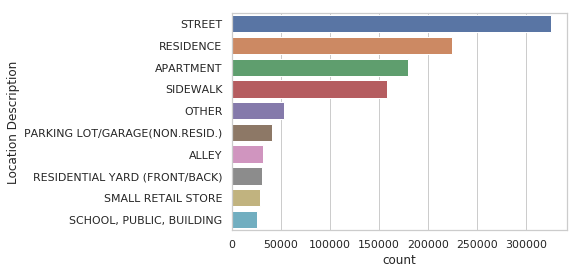

In [11]:
sns.countplot(y= 'Location Description', data = crimes_12to17, order = crimes_12to17['Location Description'].value_counts().iloc[:10].index)

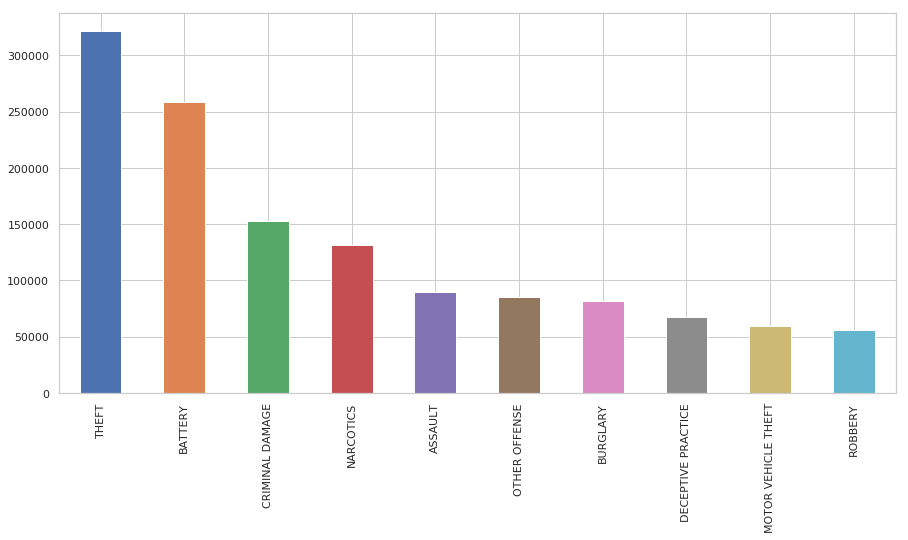

In [12]:
crimes_12to17['Primary Type'].value_counts().nlargest(10).plot(kind='bar', figsize=(15,7))

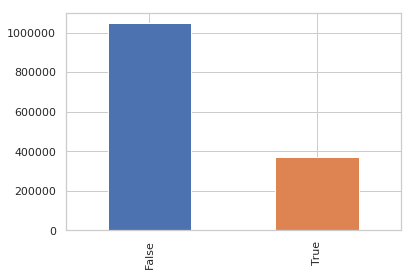

In [13]:

crimes_12to17['Arrest'].value_counts().plot(kind='bar')

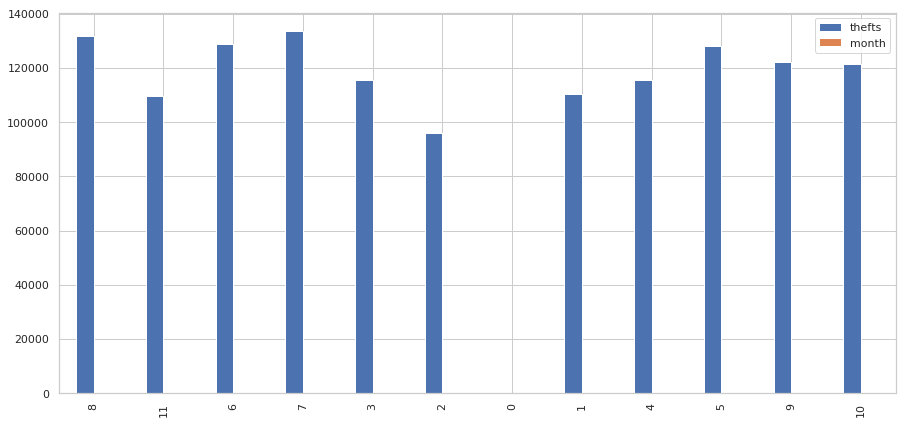

In [15]:
theft_months = pd.DataFrame({"thefts" : crimes_12to17['Month'].value_counts(), "month" : crimes_12to17["Month"].value_counts().index}, index = range(12))
theft_months.fillna(0, inplace=True)
theft_months = theft_months.sort_values(['month'], ascending=[1])
theft_months.plot(kind ='bar', figsize=(15,7))
plt.xlabel="as"
plt.show()

import folium
chicago_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

for i in range(500):
    lat = crimes_12to17['Location']
    long = crimes_12to17['Longitude']
    radius = crimes_12to17['ValueCount'].iloc[i] / 45
    
    if crimes_12to17['ValueCount'].iloc[i] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               crimes_12to17['ValueCount']
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_crime)

In [16]:
crimes_12to17.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'Month', 'Day'],
      dtype='object')

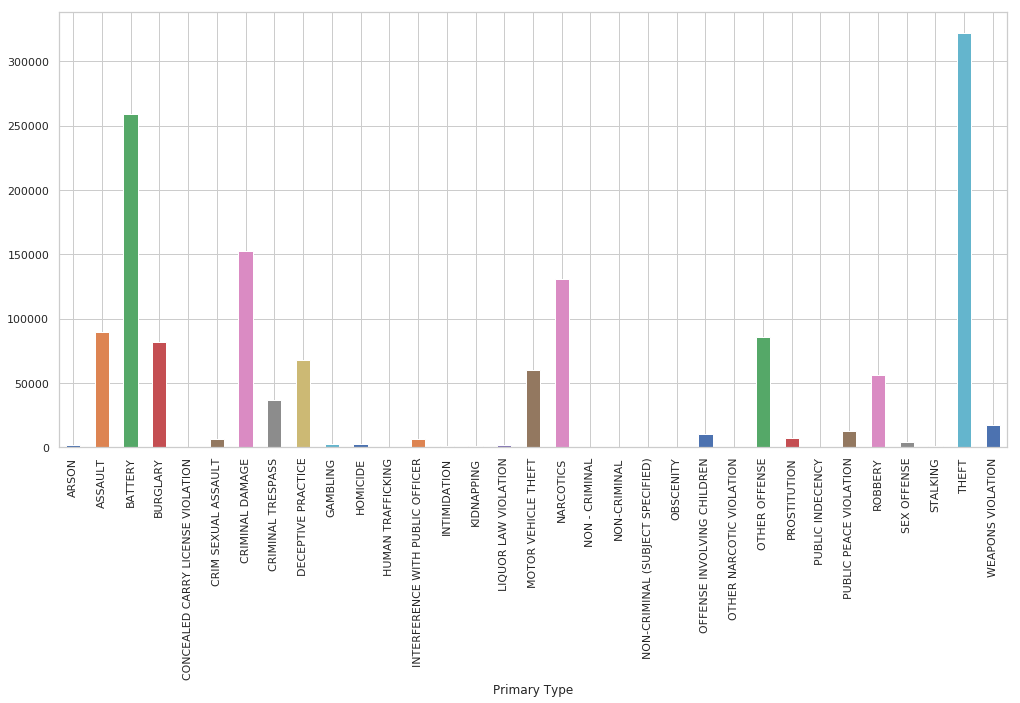

In [25]:
crimes_12to17.groupby('Primary Type')['Day'].count().plot.bar(figsize=(17,8))

/opt/conda/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'All Crime Distribution per District')

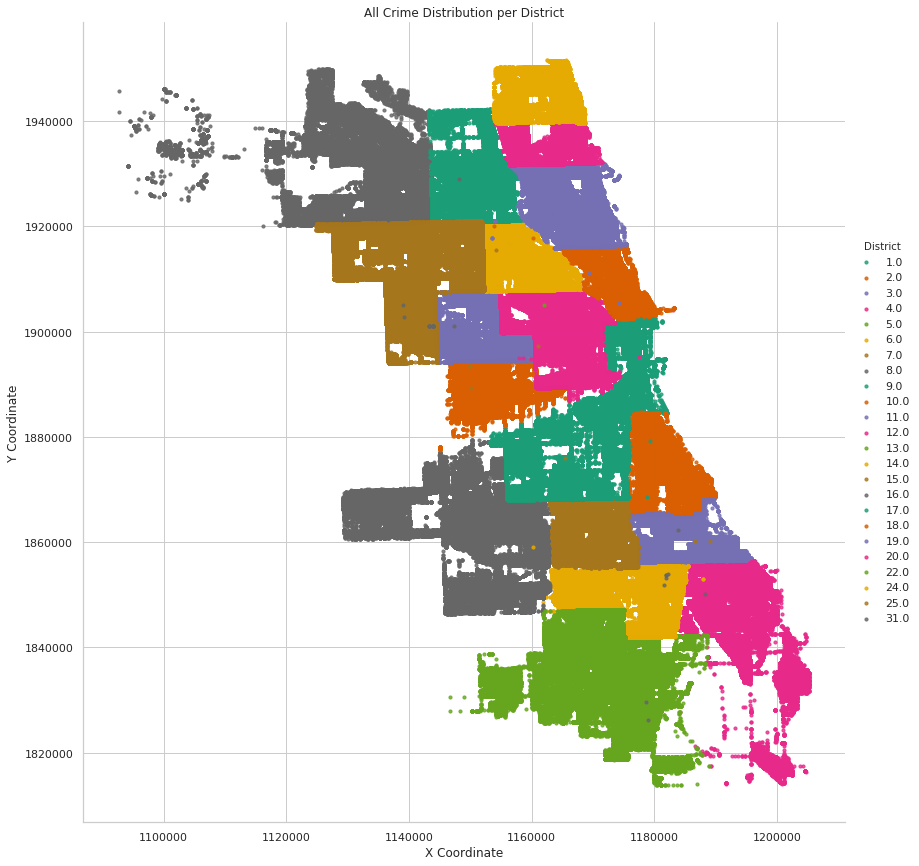

In [19]:
crime_data = crimes_12to17.loc[(crimes_12to17['X Coordinate']!=0)]

sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=crime_data[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")

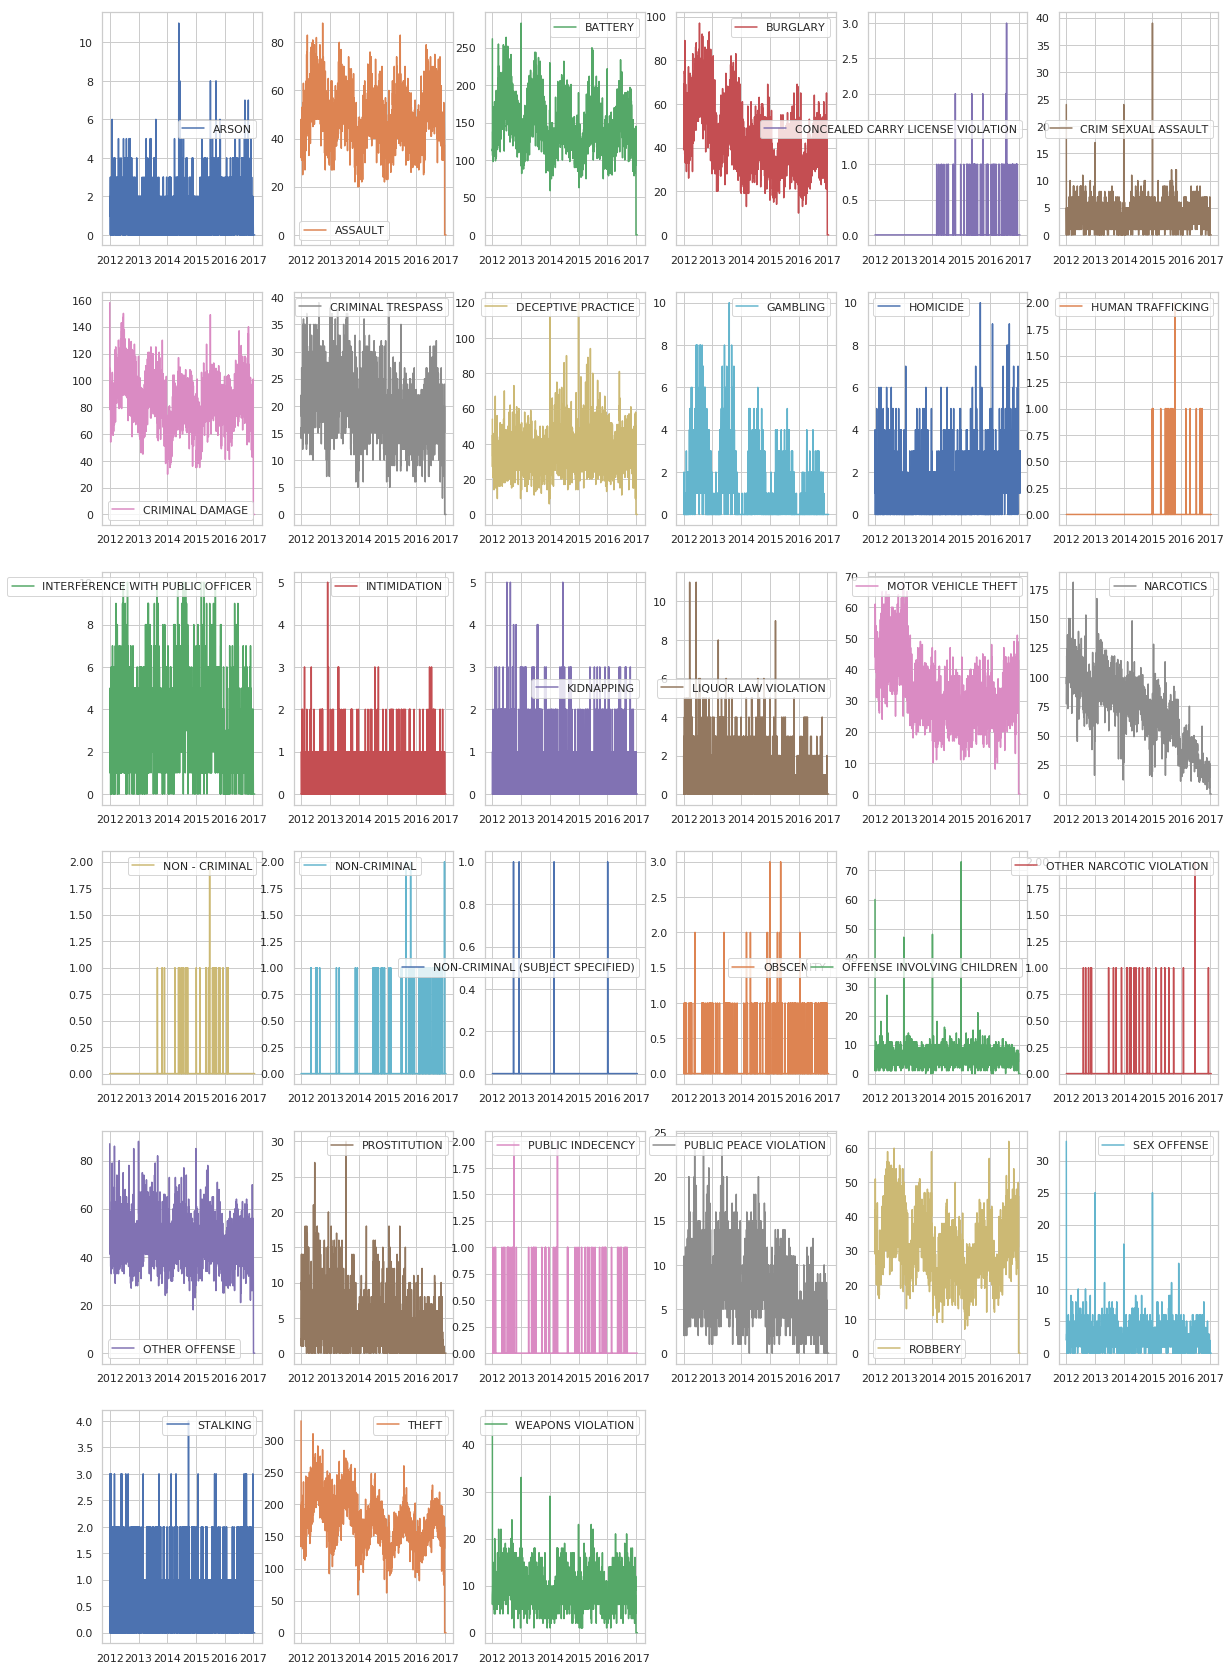

In [31]:
Crime_Data_date = crimes_12to17.pivot_table('ID', aggfunc = np.size, columns = 'Primary Type', 
                                         index = crimes_12to17.index.date, fill_value = 0)

Plot = Crime_Data_date.plot(figsize = (20,30), subplots = True, layout = (6,6),
                                  sharex = False, sharey = False)
plt.show()

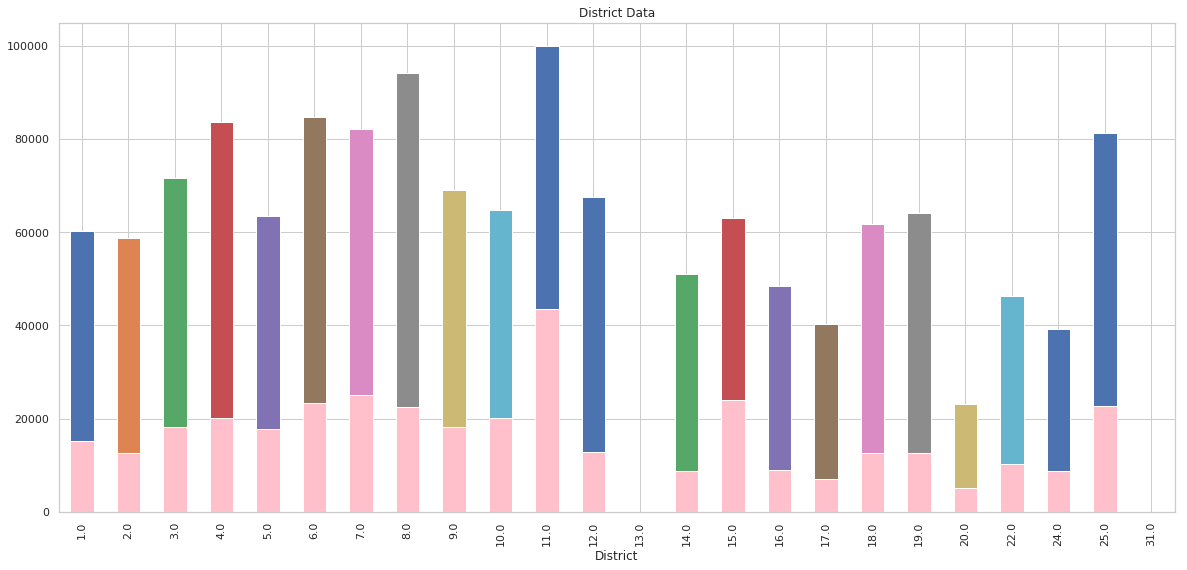

In [52]:
Crime_Data_district = crimes_12to17.pivot_table('Arrest', aggfunc = np.sum, columns = ['District'], 
                                         index = crimes_12to17.index.date, fill_value = 0)
plt.figure(figsize = (8,5))
crimes_12to17.groupby(crimes_12to17['District']).size().plot(kind = 'bar', figsize=(20,9))
Crime_Data_district.sum().plot(kind = 'bar', color = 'pink')
plt.title('District Data')

plt.show()